In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [12]:
#importing the csv file and checking the data
df=pd.read_csv("C:/Users/jatin/Downloads/Python_Diwali_Sales_Analysis-main/Python_Diwali_Sales_Analysis-main/Diwali Sales Data.csv", encoding= 'unicode_escape')
print(df)

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [14]:
df.info()#get all the column details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [15]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)#delete the status and unnamed 

In [17]:
pd.isnull(df).sum()#checking null values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [18]:
df.dropna(inplace=True)#drop null values

In [19]:
print(df)

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [21]:
# change data type
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

In [22]:
df.describe()#get the mean median min vales max value count

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

# AGE

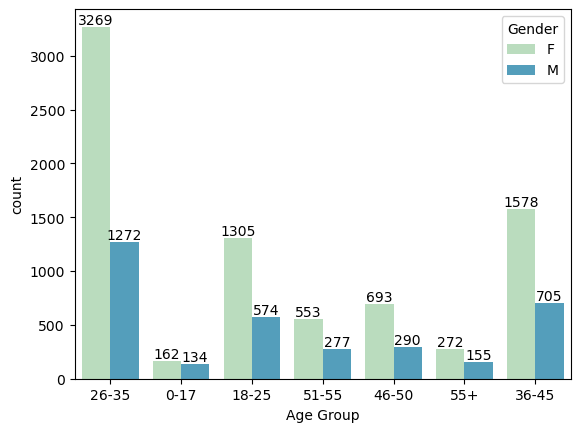

In [28]:
age = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',palette="GnBu")

for bars in age.containers:
    age.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

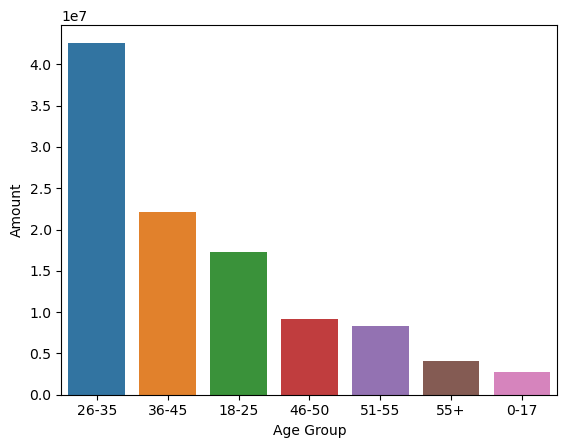

In [37]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
c=["red","blue","pink","yellow","black","green"]
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs

# Gender

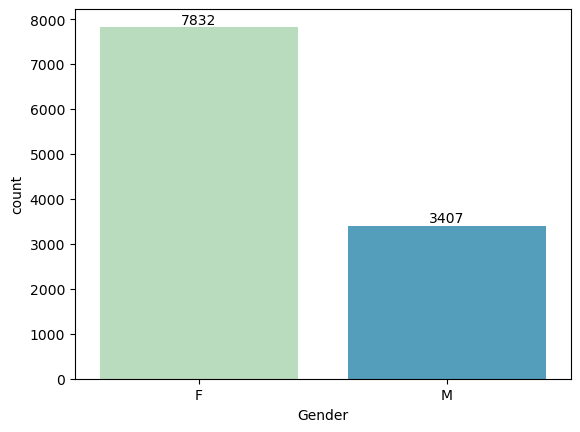

In [41]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df,palette="GnBu")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

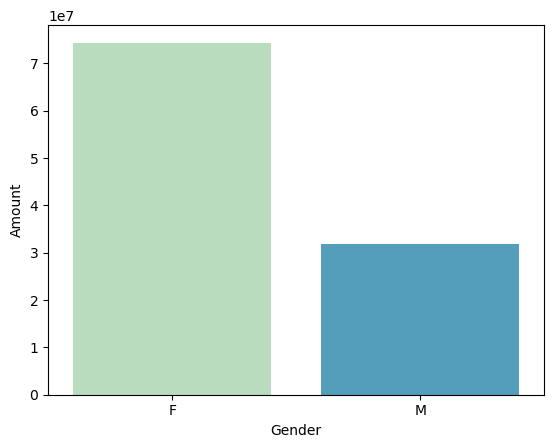

In [47]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,palette="GnBu")

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

# state

<Axes: xlabel='State', ylabel='Orders'>

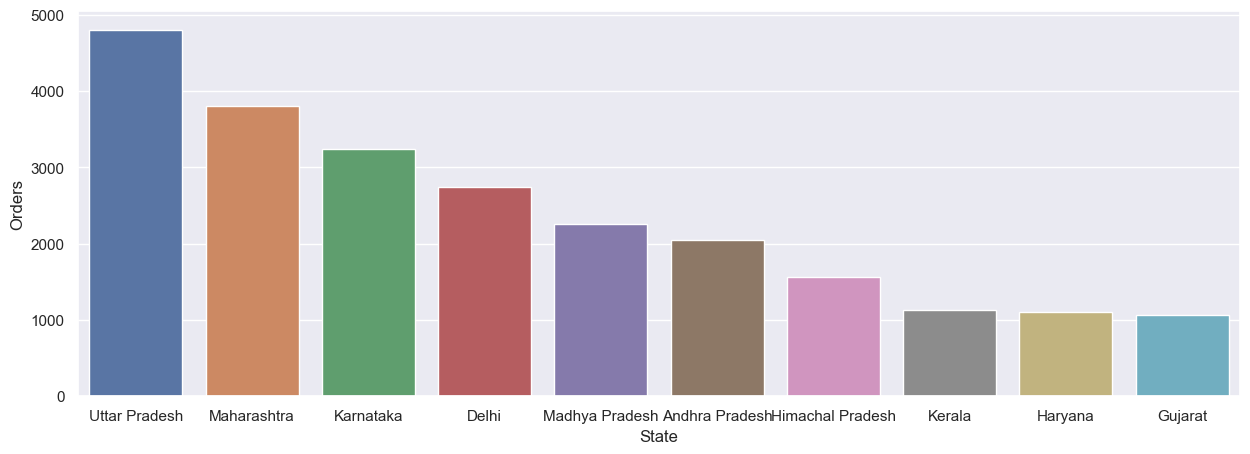

In [55]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

from the above graph we can say that uttar pradesh is the highest order placing state and followed by Maharashtra ,Karnataka,Delhi,Madhya Pradesh and so on

<Axes: xlabel='State', ylabel='Amount'>

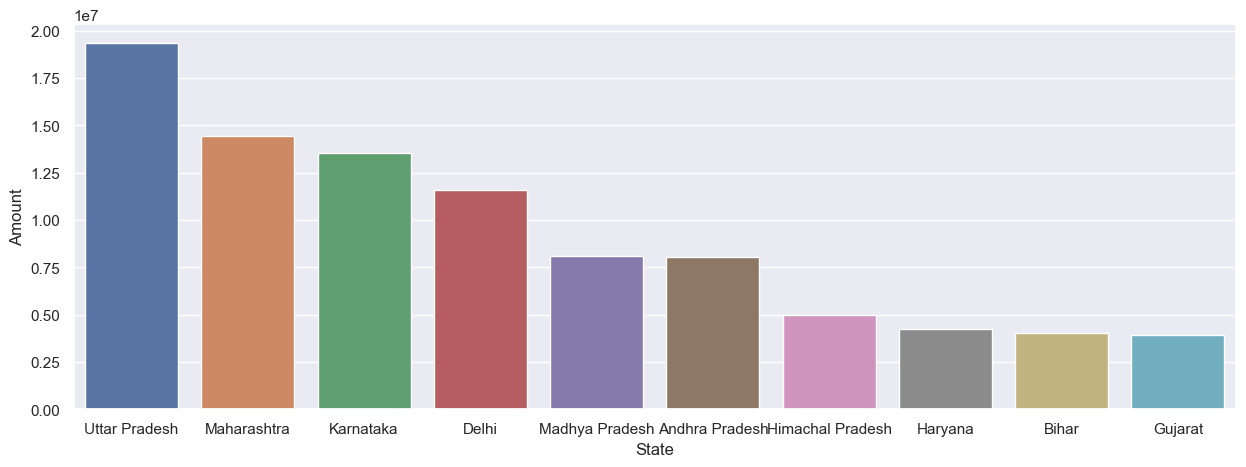

In [56]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively but now Haryana is on 8th position in
getting the high amount than kerela.

# Marital Status

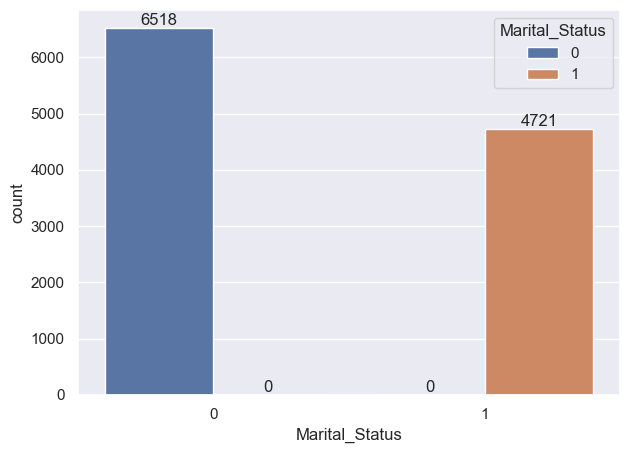

In [69]:
ax = sns.countplot(data = df, x = 'Marital_Status',hue="Marital_Status")

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that most of the buyers are married  and they have high purchasing power

<Axes: xlabel='Marital_Status', ylabel='Amount'>

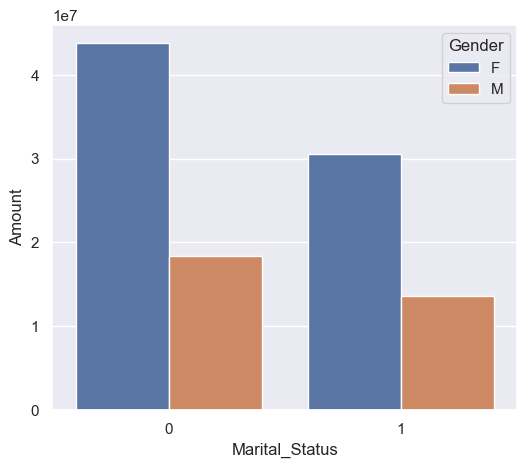

In [70]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

# Occupation

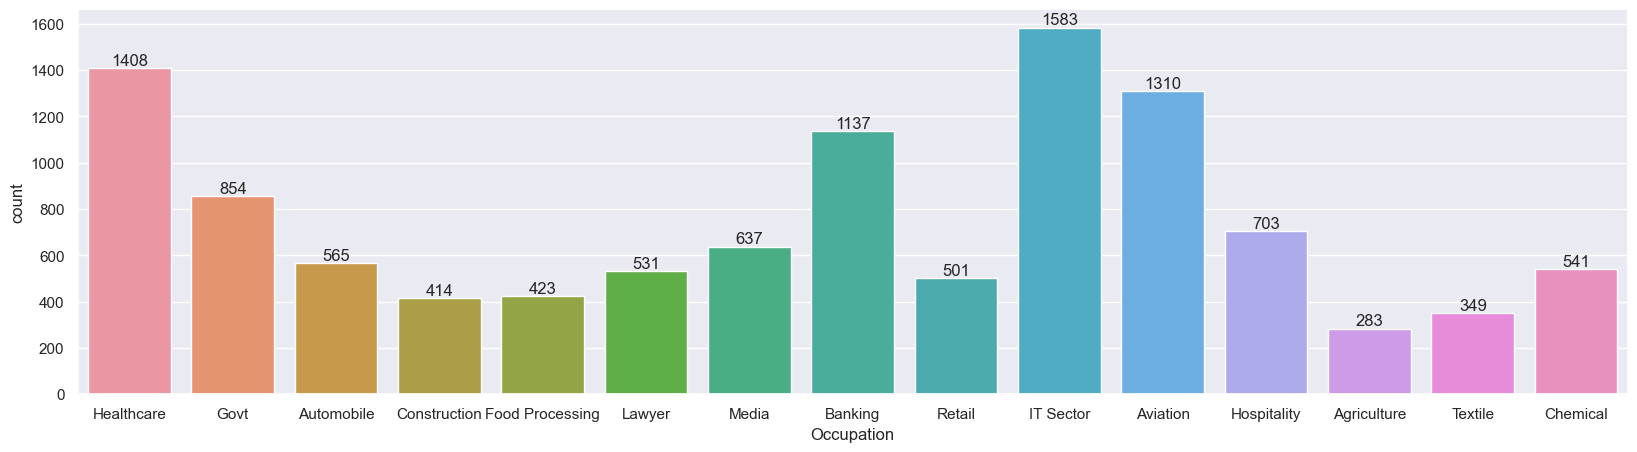

In [71]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

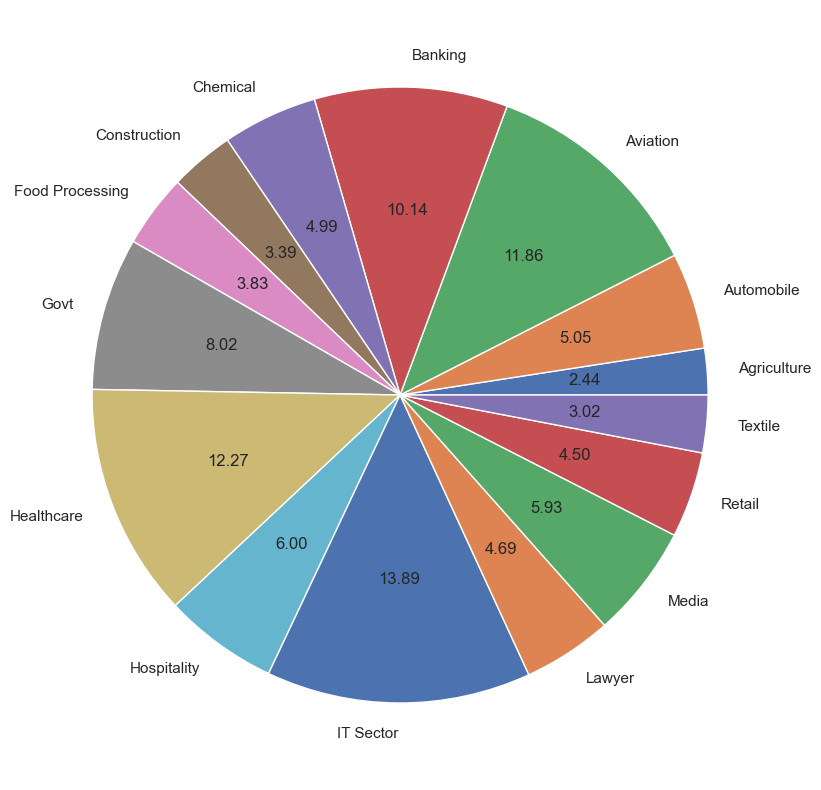

In [95]:
af=pd.DataFrame(df)
group=af.groupby("Occupation")["Amount"].sum()
plt.pie(group.values, labels=group.index,autopct="%.2f")
sns.set(rc={'figure.figsize':(50,10)})
plt.show()
plt.show()

From above bar graph and pie chart we can see that most of the buyers are working in IT, Healthcare and Aviation sector

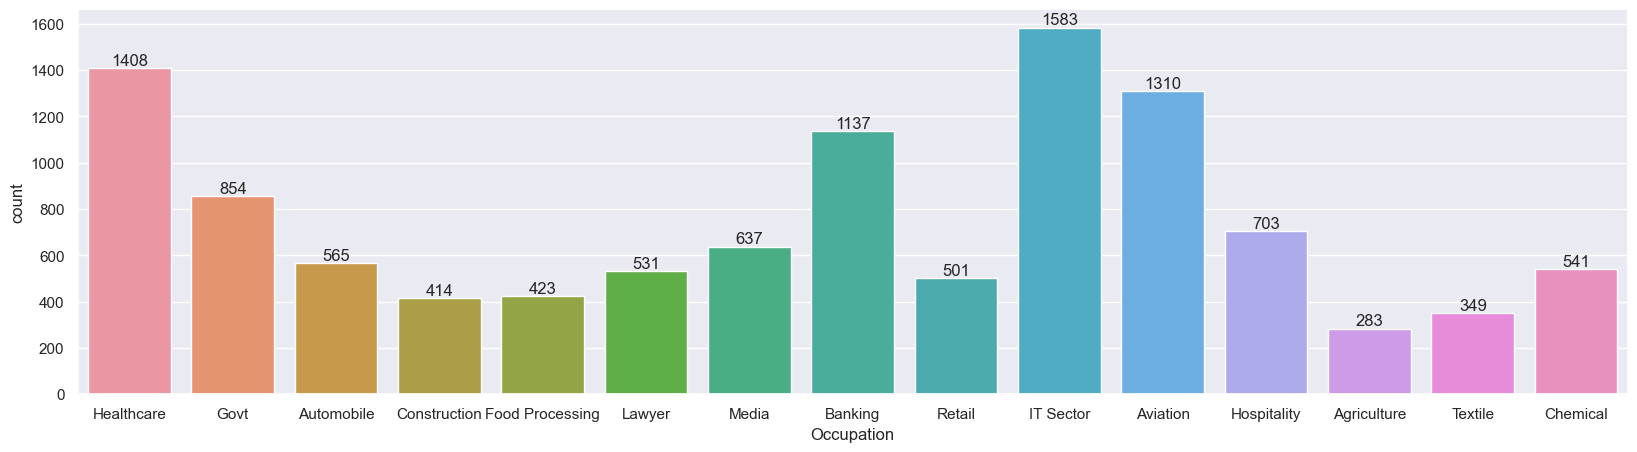

In [88]:
#sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

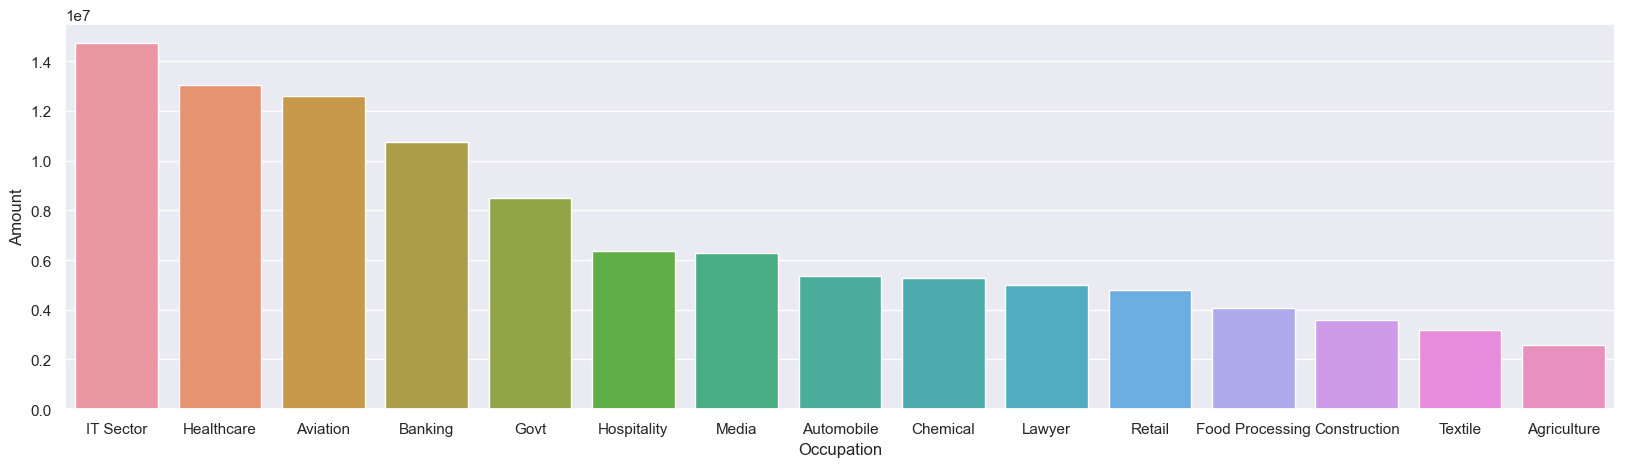

In [89]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

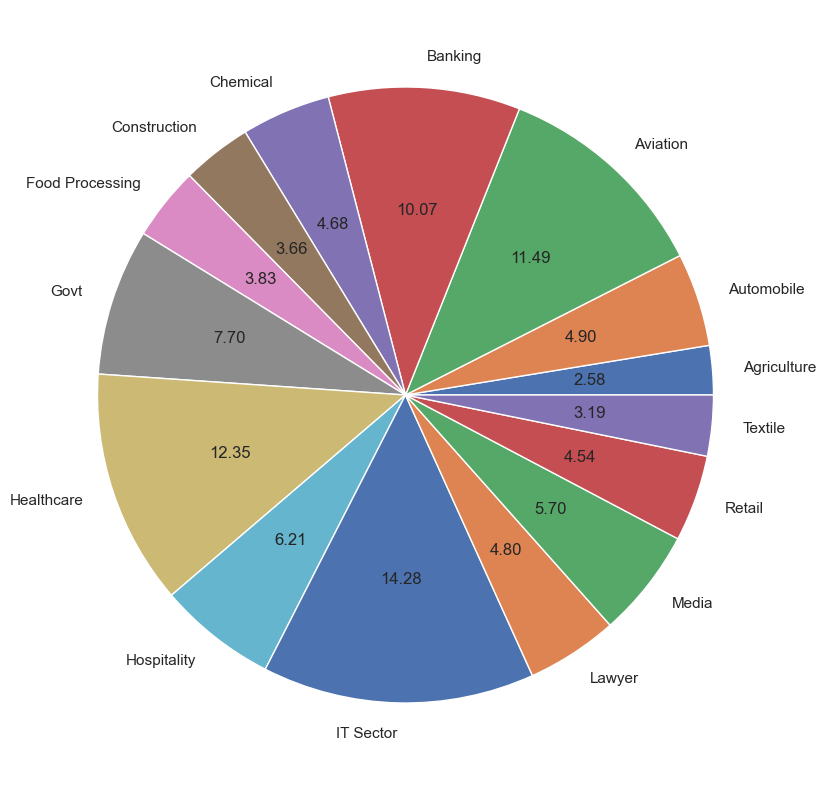

In [92]:
af=pd.DataFrame(df)
group=af.groupby("Occupation")["Orders"].sum()
plt.pie(group.values, labels=group.index,autopct="%.2f")
sns.set(rc={'figure.figsize':(50,20)})
plt.show()

From above bar graph and pie chart we can see that most of the orders are placed from IT, Healthcare and Aviation sector

# Product Category

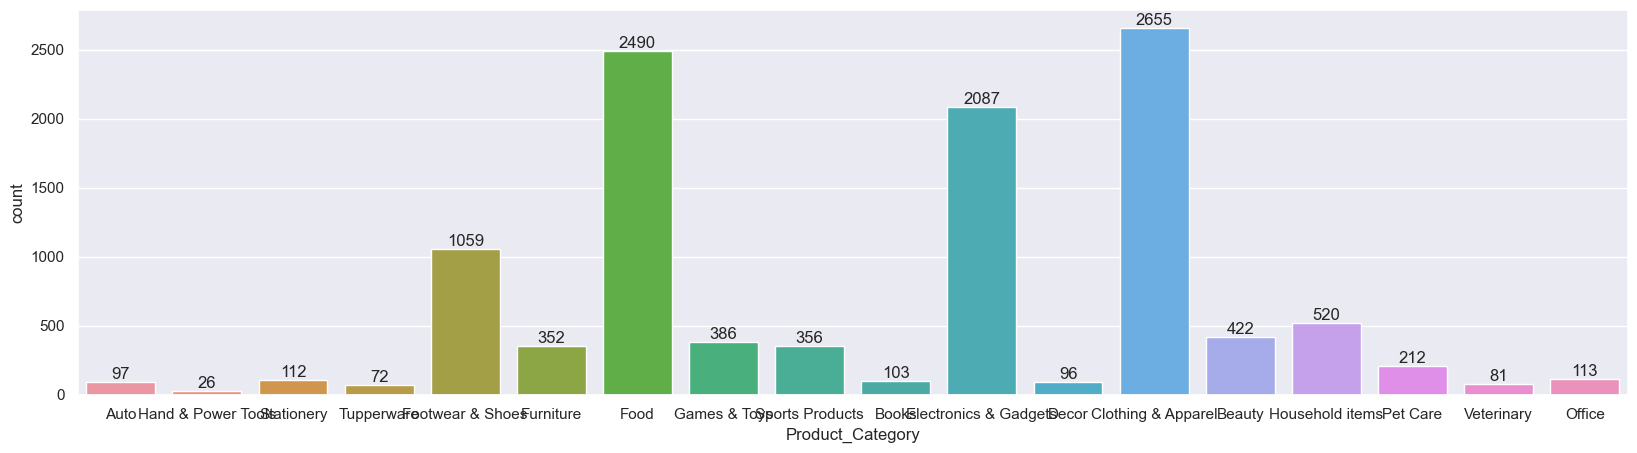

In [105]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

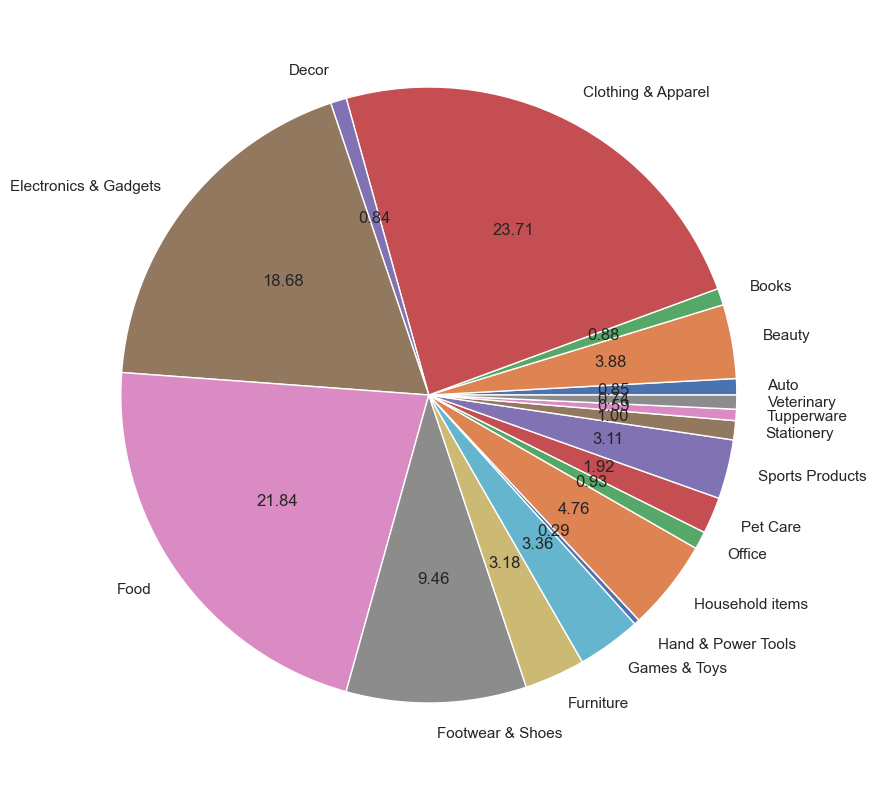

In [123]:
af=pd.DataFrame(df)
group=af.groupby("Product_Category")["Orders"].sum()
plt.pie(group.values, labels=group.index,autopct="%.2f")
sns.set(rc={'figure.figsize':(20,15)})
plt.show()

From above graphs we can see that most of the orders are from Food, Clothing and Electronics category

<Axes: xlabel='Product_Category', ylabel='Amount'>

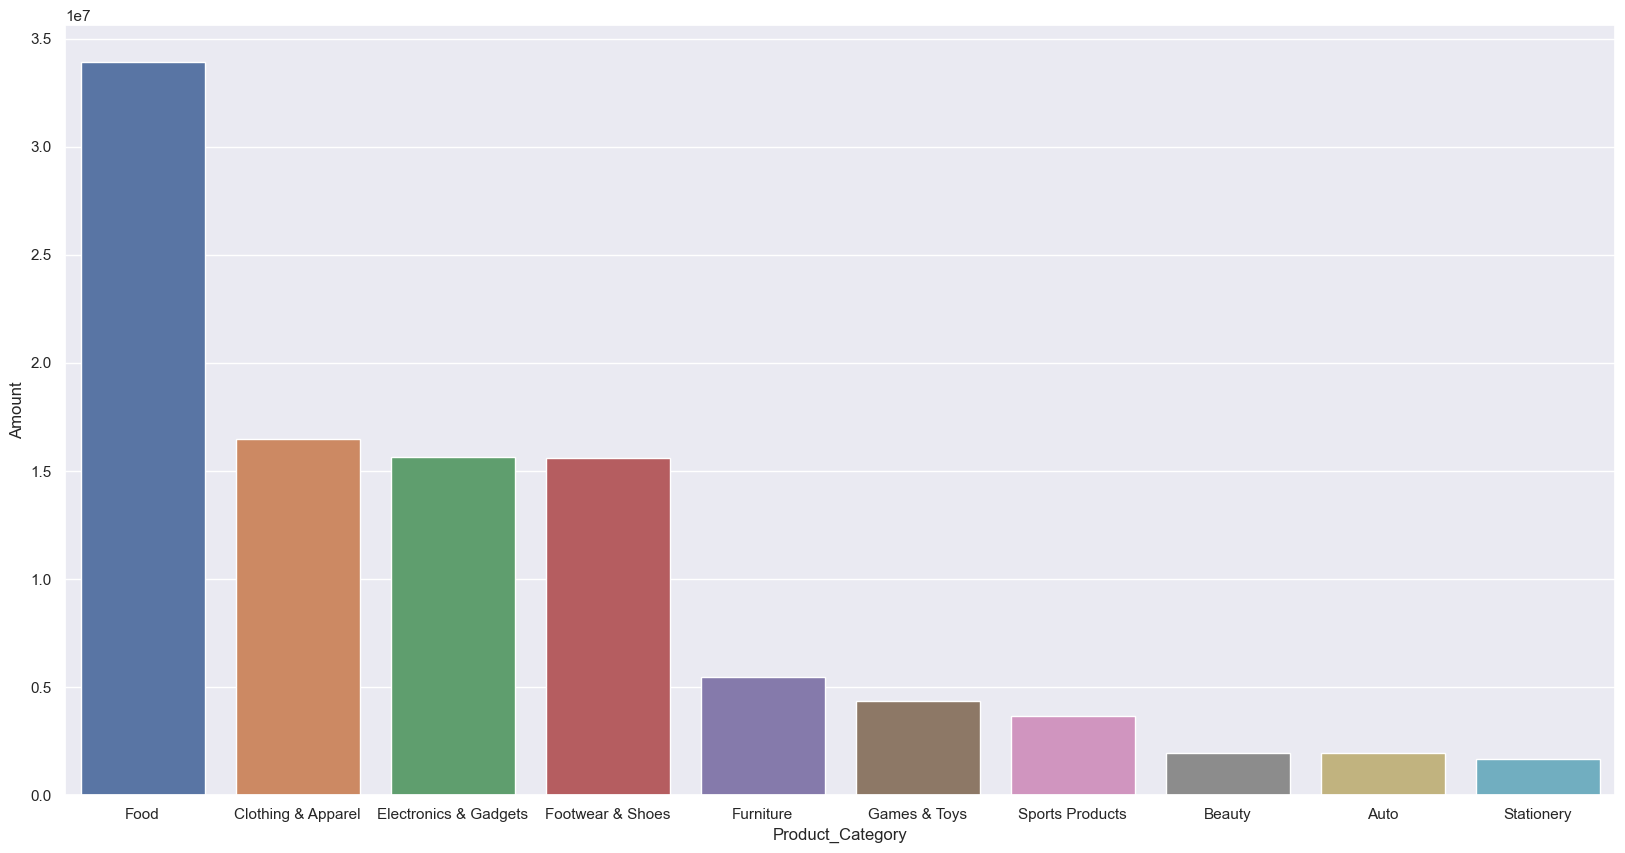

In [140]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')


From above graphs and pie chart we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

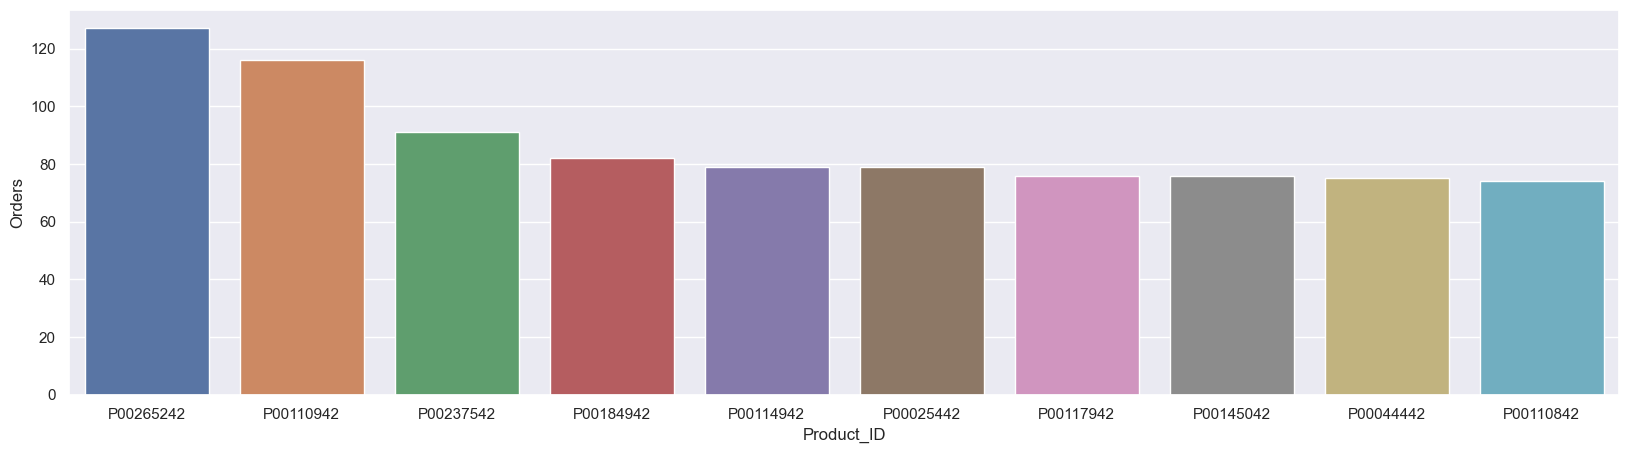

In [142]:
# top 10 most sold products 
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

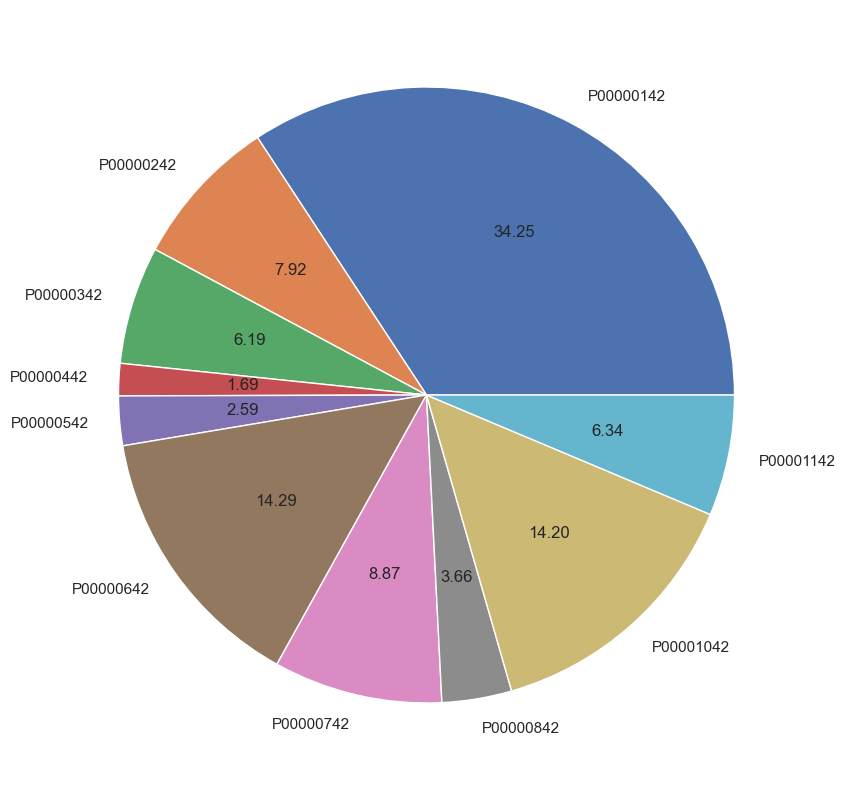

In [146]:
af=pd.DataFrame(df)
group=af.groupby("Product_ID")["Amount"].sum().head(10)
plt.pie(group.values, labels=group.index,autopct="%.2f")
sns.set(rc={'figure.figsize':(50,10)})
plt.show()


From above graphs and pie chart which are the most of the sold products according to their product id

# Conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka have more purchasing power and  the most are  working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category